In [1]:
import sys
import os
# Add the path where functions.py is located
sys.path.append('/home/jiguo/denovo_rpe1_scrnaseq/analysis_pipeline')
import functions as f
import pandas as pd

In [2]:
adata = f.load_adata(adata_file='/home/jiguo/data/data/anndata/adata_all_pp_cc.h5', gene_list=None)
adata

AnnData object with n_obs × n_vars = 12572 × 11428
    obs: 'condition', 'replicate', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'n_genes', 'S_score', 'G2M_score', 'phase'
    var: 'ensembl_gene_id', 'gene_name', 'in_jakobsen', 'mito', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'mean', 'std'
    uns: 'log1p'
    layers: 'counts', 'log', 'normalised', 'regress_cc'

In [3]:
RNA_meta = f.load_gene_list(gene_list_file="/home/jiguo/denovo_rpe1_scrnaseq/Genes_with_GO_terms_RNA-metabolic-process - select.csv", gene_index="Gene names")
centro_genes = f.load_gene_list(gene_list_file="/home/jiguo/denovo_rpe1_scrnaseq/CentrosomalProteinGenes.txt", gene_index="Gene Names")
RNA_meta = f.check_genes_in_data(RNA_meta, adata)
centro_genes = f.check_genes_in_data(centro_genes, adata)


There are 285 genes out of 1558 not found in the data object.
There are 5 genes out of 148 not found in the data object.


In [4]:
corr_centrinone = pd.read_csv('/home/jiguo/output/correlation/corr_centrinone.csv', index_col=0)

In [5]:
corr_control = pd.read_csv('/home/jiguo/output/correlation/corr_control.csv', index_col=0)


In [6]:
corr_wo2h = pd.read_csv('/home/jiguo/output/correlation/corr_wo2h.csv', index_col=0)

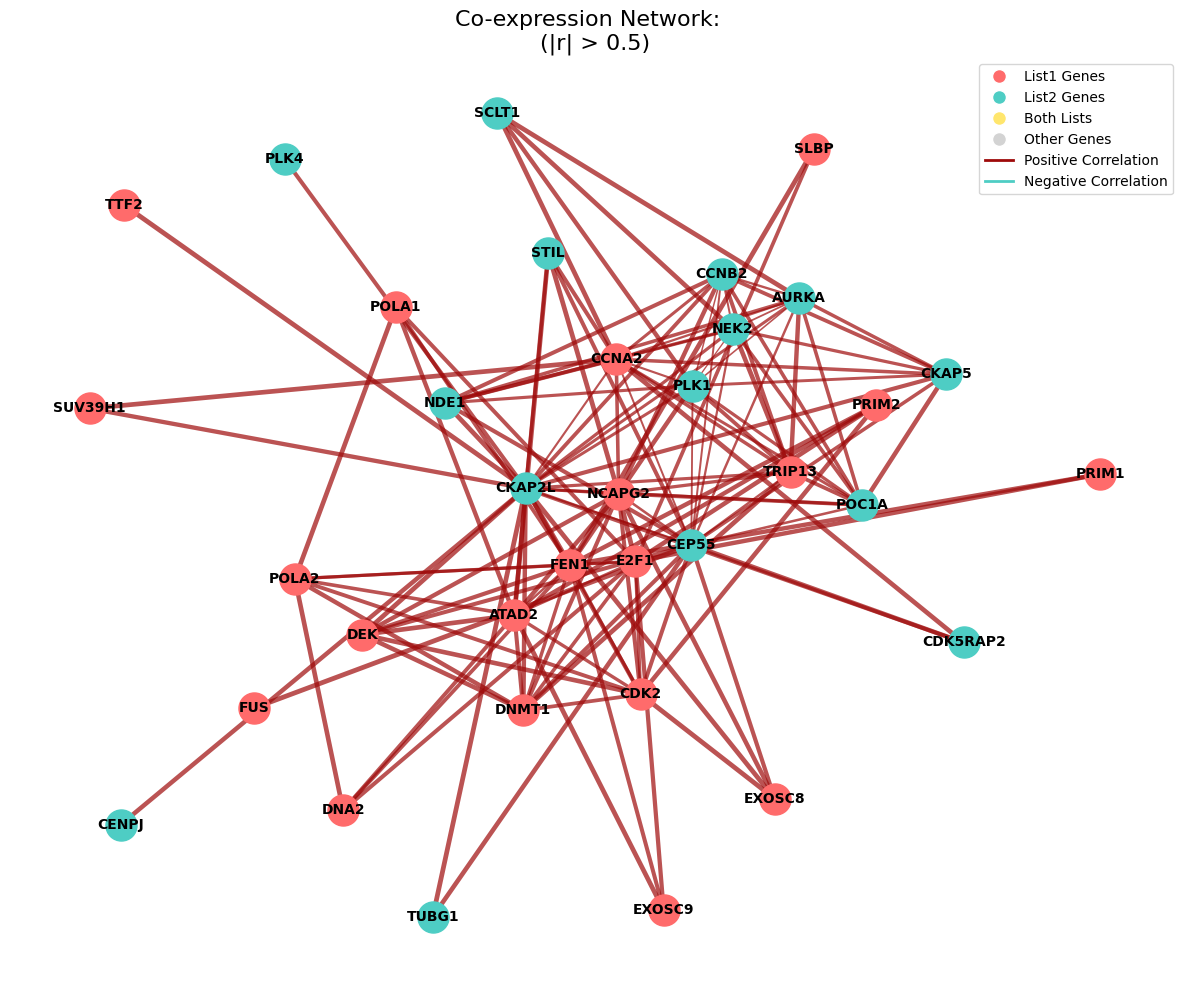

In [7]:
f.plot_gene_network_old(
    corr_wo2h,
    gene_list1=RNA_meta,
    gene_list2=centro_genes,
    threshold=0.5,
    iteration=25,
)

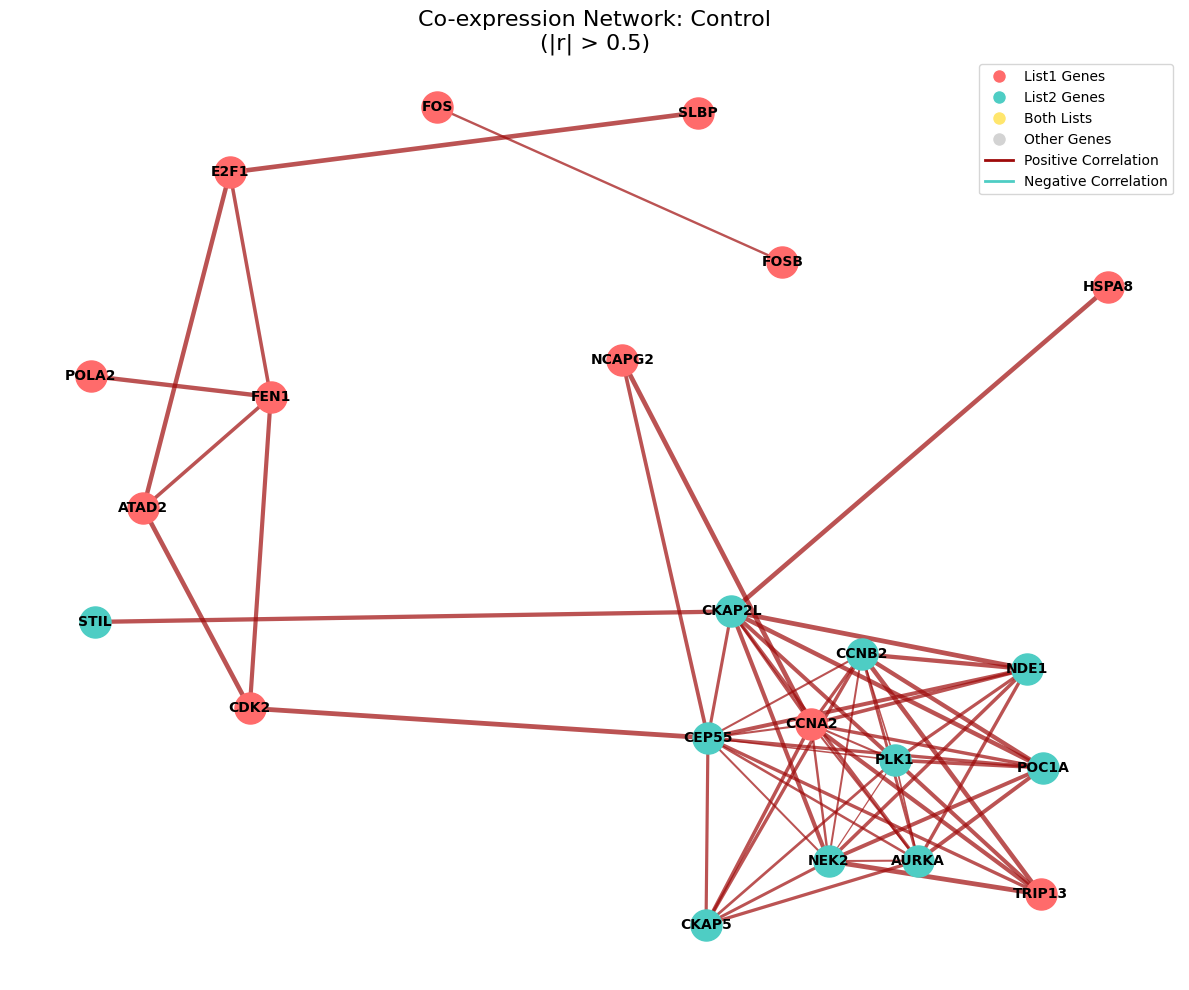

In [9]:
f.plot_gene_network_old(
    corr_control,
    gene_list1=RNA_meta,
    gene_list2=centro_genes,
    threshold=0.5,
    iteration=25,
    title='Control',
)

In [9]:
corr_wo8h = pd.read_csv('/home/jiguo/output/correlation/corr_wo8h.csv', index_col=0)

Total nodes before removing isolated nodes: 1309
Removed 1288 isolated nodes. Remaining nodes: 21
Plotting the gene network...
adding edges and nodes to the plot...


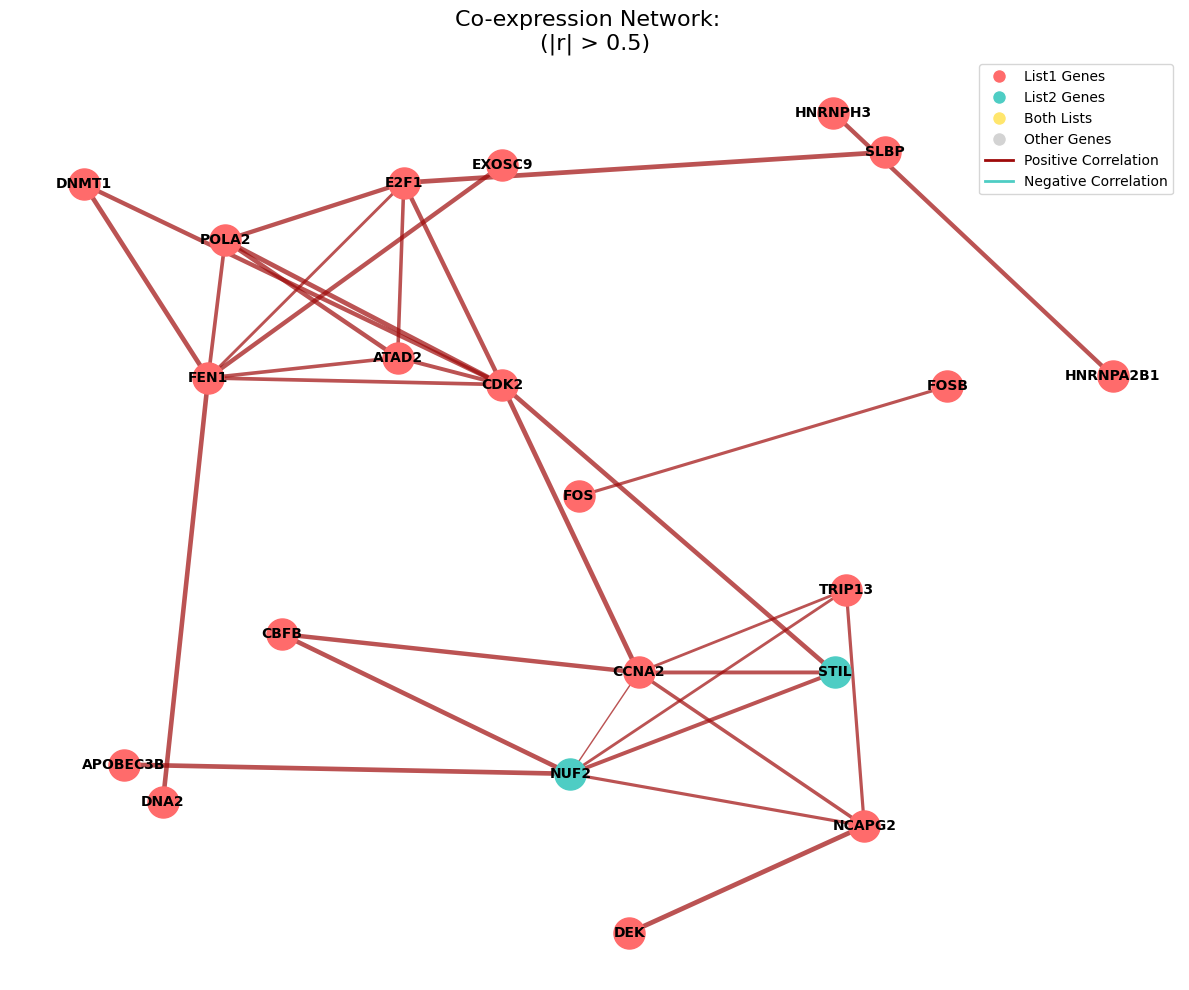

In [ ]:
f.plot_gene_network_old(
    corr_wo8h,
    gene_list1=RNA_meta,
    gene_list2=centro_genes,
    threshold=0.5,
    iteration=25,
)

There are 0 genes out of 1412 not found in the data object.


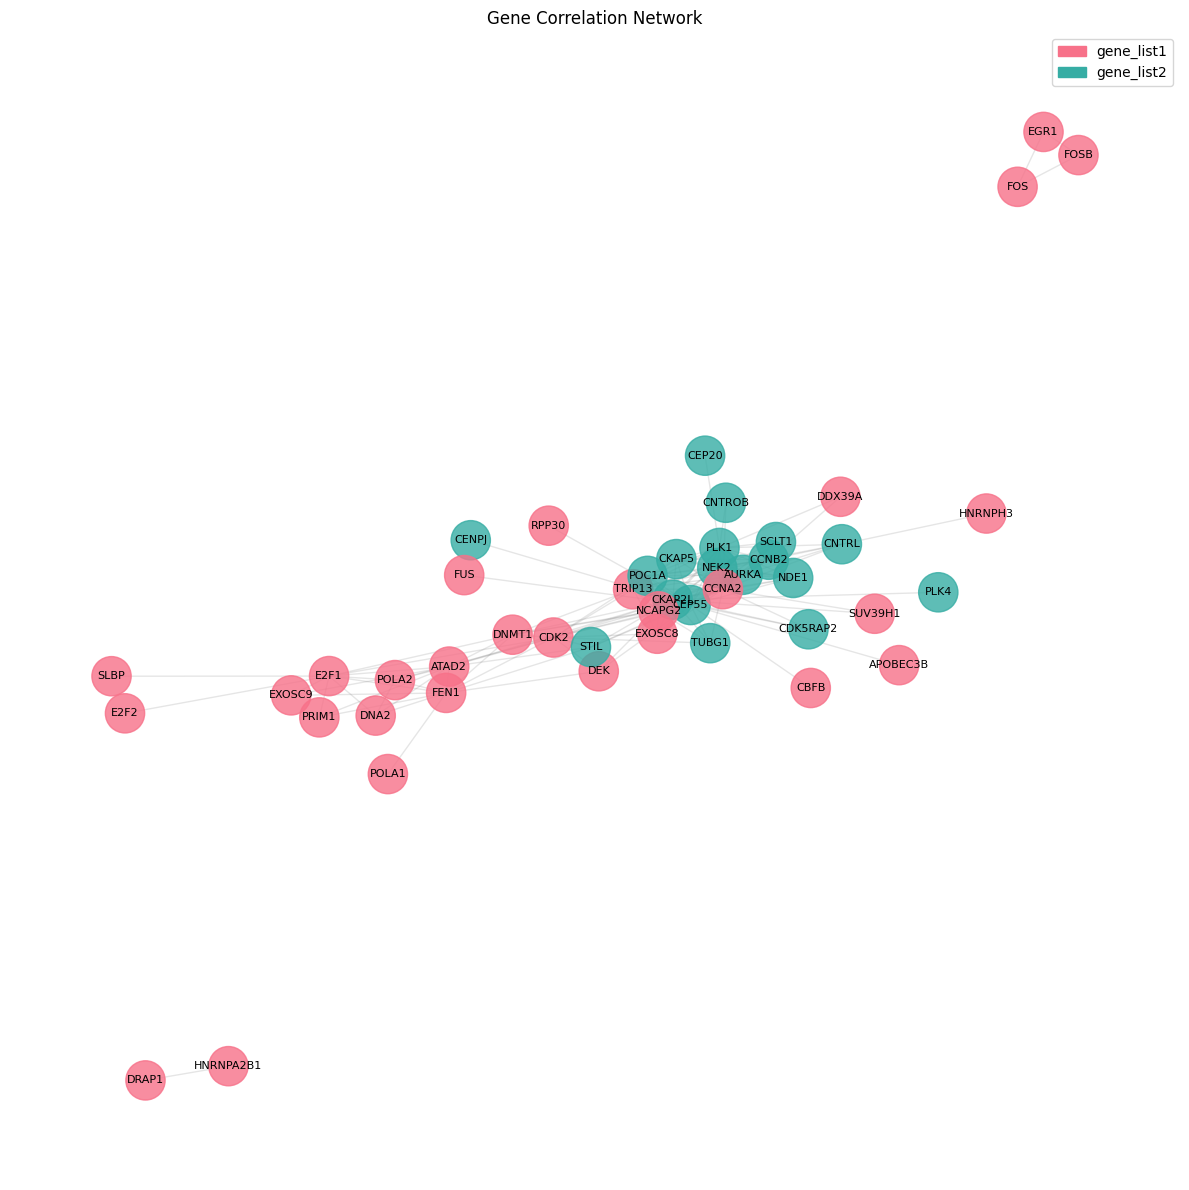

In [10]:
G_centrinone, L_centrinone, labels_centrinone= f.build_gene_network(
    corr_centrinone,
    gene_list1=RNA_meta,
    gene_list2=centro_genes,
    threshold=0.5)
f.plot_gene_network(
    G_centrinone,
    color_by='category')

### Module detecttion for the network

In [ ]:
import

## plot Heatmap for correlation matrix

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_correlation_heatmap(corr_matrix, gene_list1, gene_list2, cluster=False):
    # Get indices of genes that exist in the correlation matrix
    genes_in_matrix_1 = [g for g in gene_list1 if g in corr_matrix.index]
    genes_in_matrix_2 = [g for g in gene_list2 if g in corr_matrix.columns]
    
    # Create subset correlation matrix
    sub_corr_matrix = corr_matrix.loc[genes_in_matrix_1, genes_in_matrix_2]
    
    if cluster:
        sns.clustermap(sub_corr_matrix, cmap='coolwarm',
                    figsize=(16, 10), square=True,)
    else:
        plt.figure(figsize=(32, 20))
        sns.heatmap(sub_corr_matrix, cmap='coolwarm')
    clustering_status = "Clustered" if cluster else "Unclustered"
    plt.title(f'Correlation Heatmap ({clustering_status}) for {len(genes_in_matrix_1)} genes vs {len(genes_in_matrix_2)} genes')
    plt.show()

/home/jiguo/denovo_rpe1_scrnaseq/venvs/rna/lib/python3.10/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)
/home/jiguo/denovo_rpe1_scrnaseq/venvs/rna/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/jiguo/denovo_rpe1_scrnaseq/venvs/rna/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


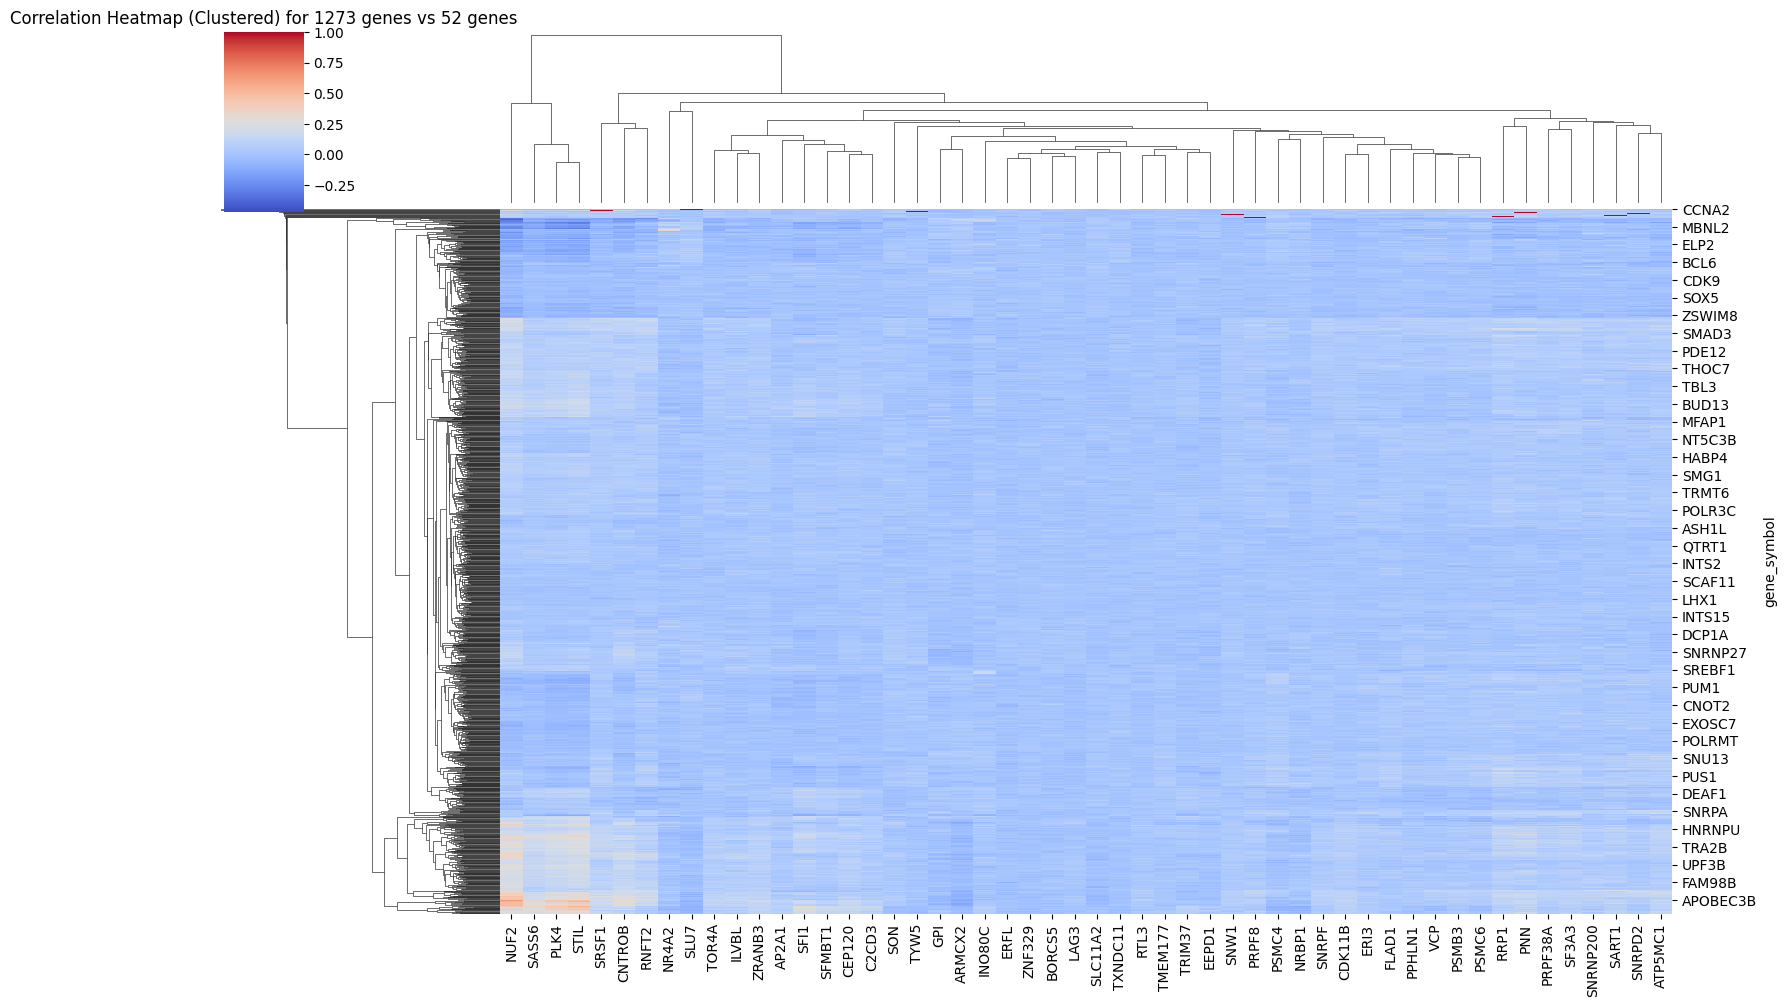

In [15]:
plot_correlation_heatmap(
    corr_centrinone,
    gene_list1=RNA_meta,
    gene_list2=centro_genes,
    cluster=True
)

/home/jiguo/denovo_rpe1_scrnaseq/venvs/rna/lib/python3.10/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)
/home/jiguo/denovo_rpe1_scrnaseq/venvs/rna/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/jiguo/denovo_rpe1_scrnaseq/venvs/rna/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


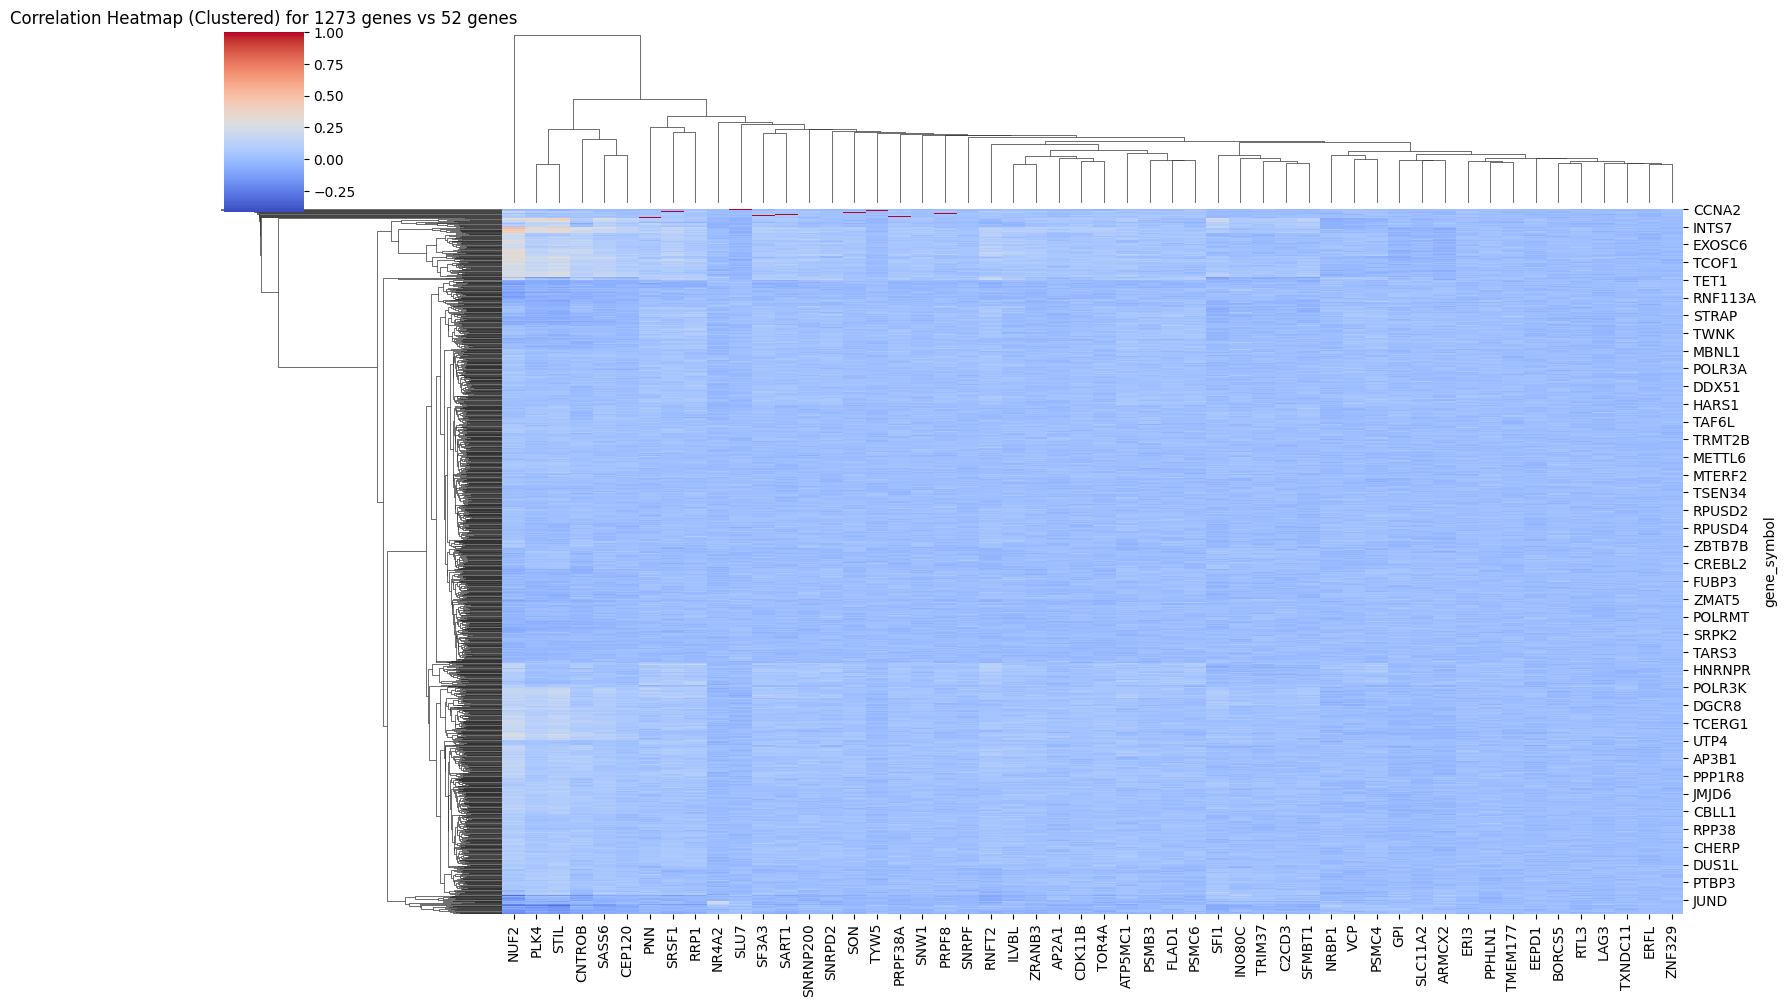

In [16]:
plot_correlation_heatmap(
    corr_control,
    gene_list1=RNA_meta,
    gene_list2=centro_genes,
    cluster=True
)

/home/jiguo/denovo_rpe1_scrnaseq/venvs/rna/lib/python3.10/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)
/home/jiguo/denovo_rpe1_scrnaseq/venvs/rna/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/jiguo/denovo_rpe1_scrnaseq/venvs/rna/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


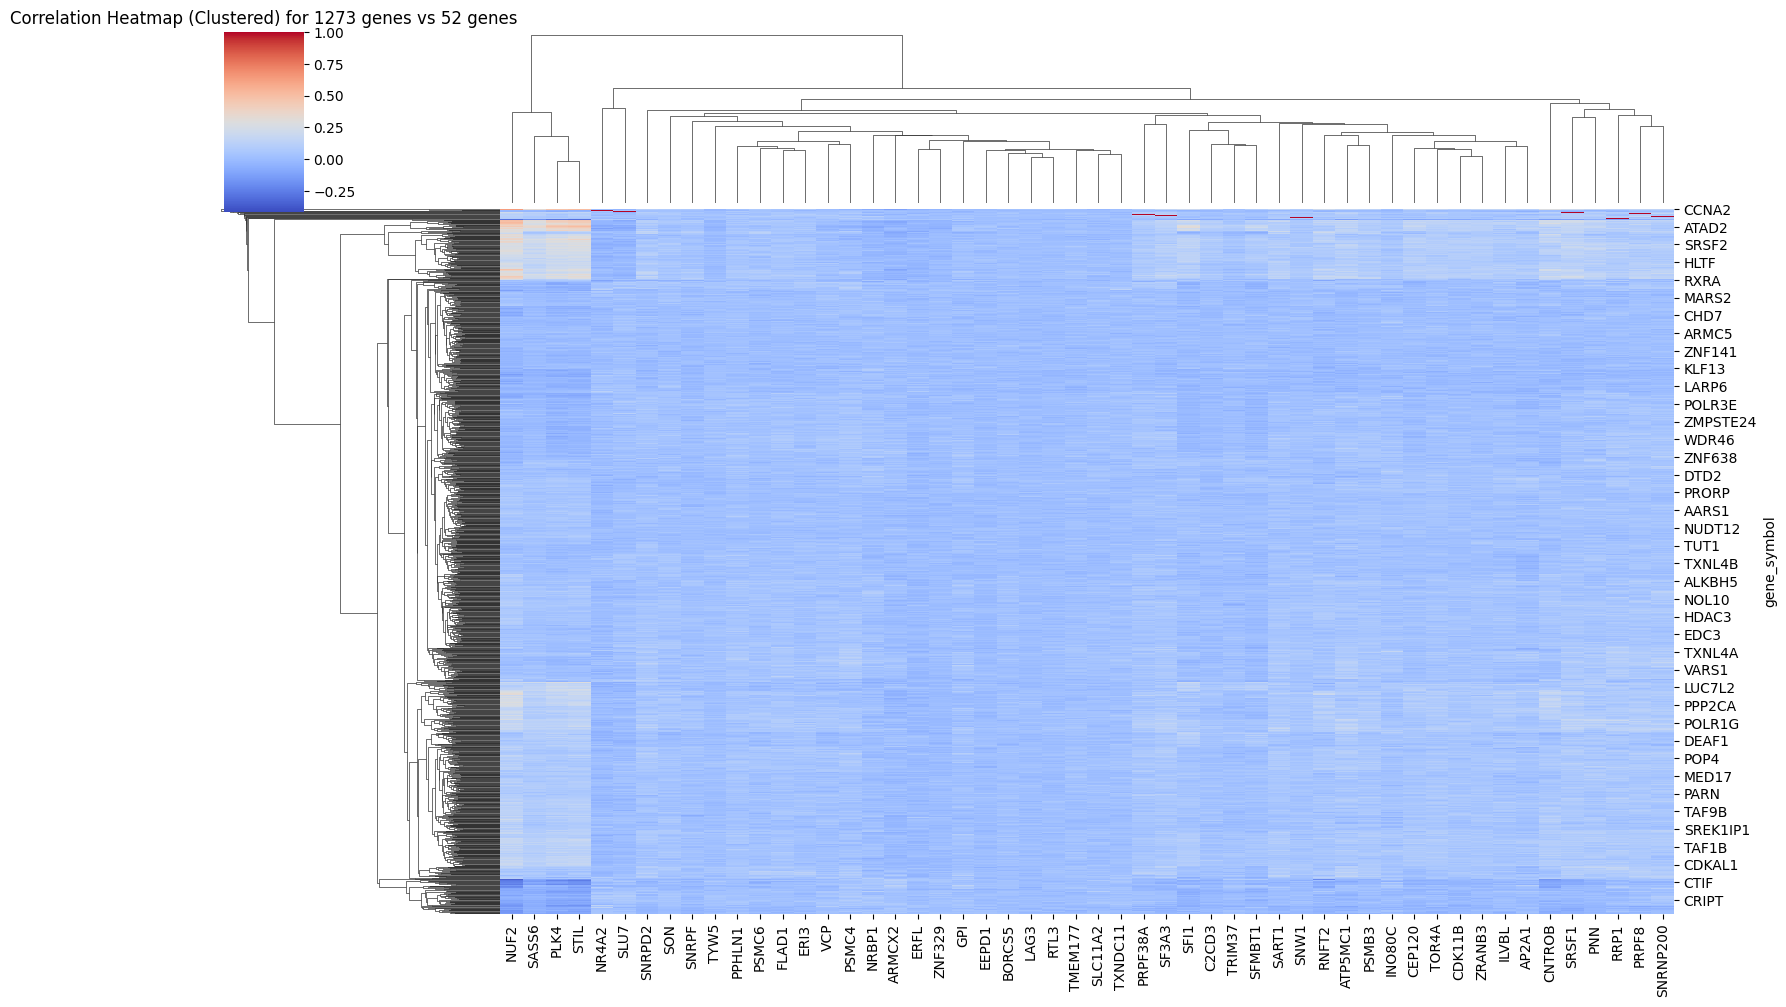

In [17]:
plot_correlation_heatmap(
    corr_wo2h,
    gene_list1=RNA_meta,
    gene_list2=centro_genes,
    cluster=True
)

/home/jiguo/denovo_rpe1_scrnaseq/venvs/rna/lib/python3.10/site-packages/seaborn/matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)
/home/jiguo/denovo_rpe1_scrnaseq/venvs/rna/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/jiguo/denovo_rpe1_scrnaseq/venvs/rna/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


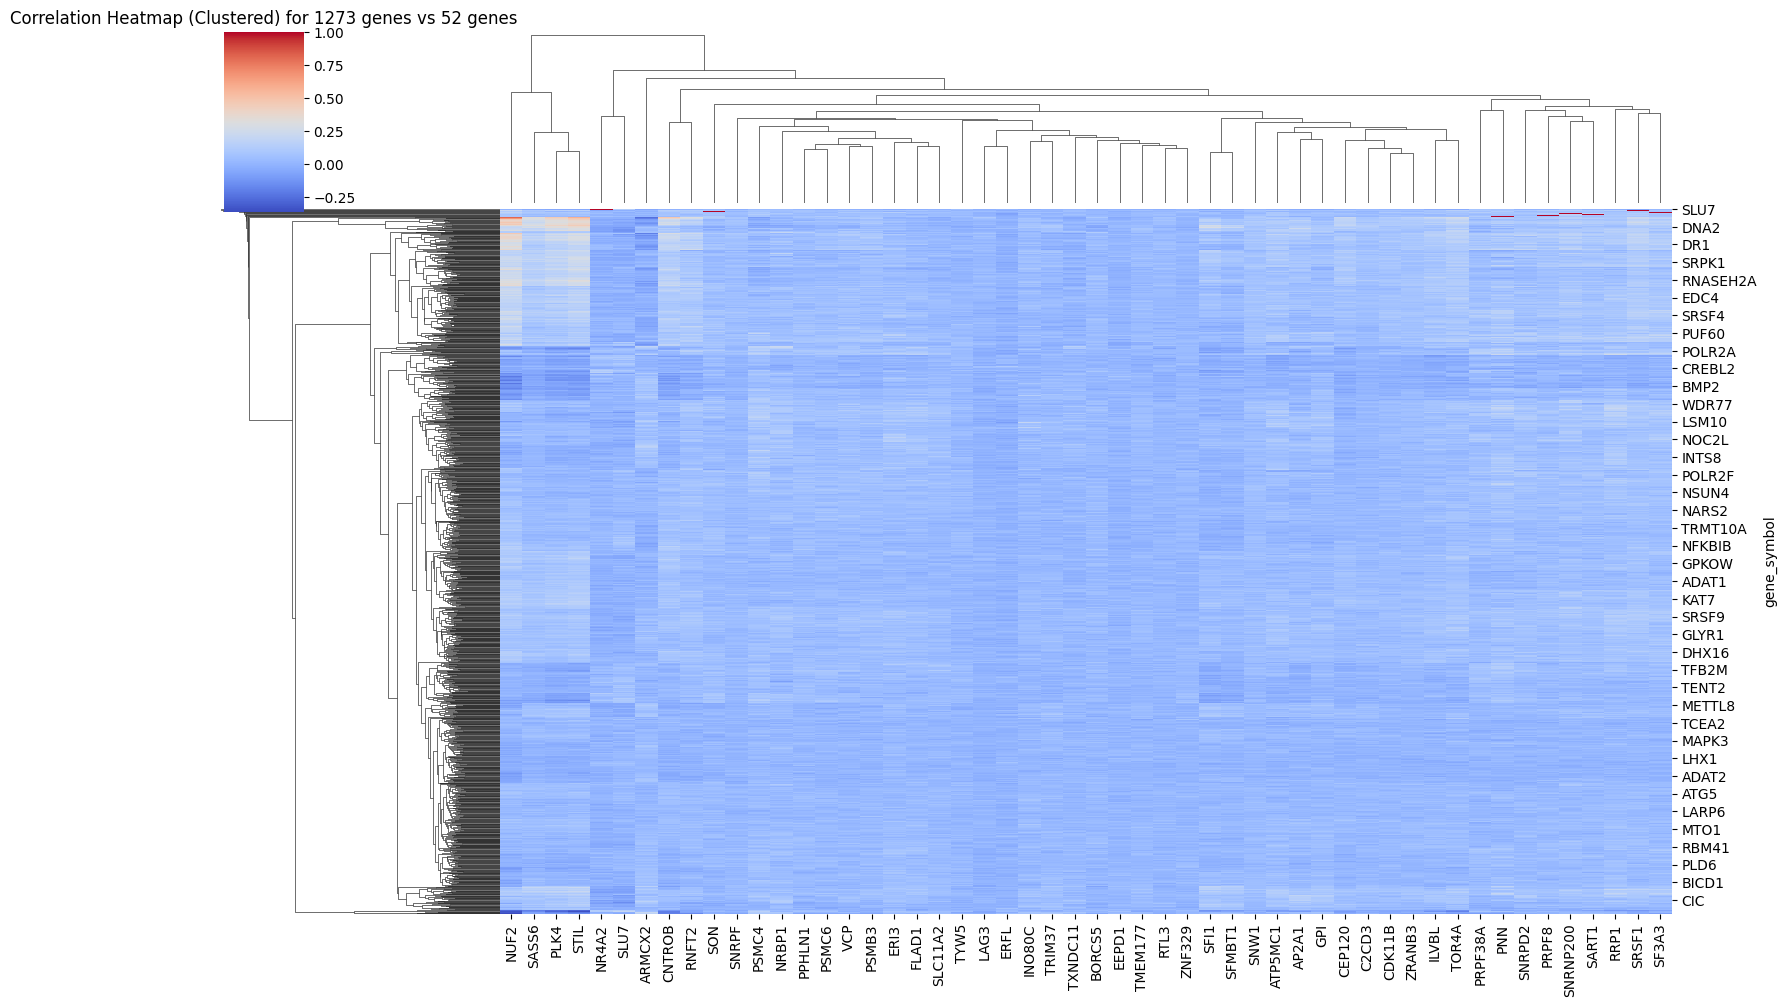

In [18]:
plot_correlation_heatmap(
    corr_wo8h,
    gene_list1=RNA_meta,
    gene_list2=centro_genes,
    cluster=True
)